In [6]:
!pip install gensim pyLDAvis nltk

In [4]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [1]:
!pip install gensim

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample preprocessed documents:
 data science interdisciplinary field uses scientific methods

TF-IDF Shape: (15, 85)

Documents 1 Top 10 Words:
 methods              0.406346
science              0.406346
scientific           0.406346
interdisciplinary    0.406346
field                0.406346
uses                 0.352843
data                 0.223418
ability              0.000000
prediction           0.000000
provides             0.000000
Name: 0, dtype: float64

Documents 2 Top 10 Words:
 ability         0.396698
systems         0.396698
learn           0.396698
improve         0.396698
provides        0.396698
machine         0.344465
learning        0.307406
transforming    0.000000
process         0.000000
predictive      0.000000
Name: 1, dtype: float64

Documents 3 Top 10 Words:
 processing     0.391991
natural        0.391991
understand     0.391991
language       0.391991
helps          0.391991
machines       0.340378
human          0.340378
points         0.000000
process  

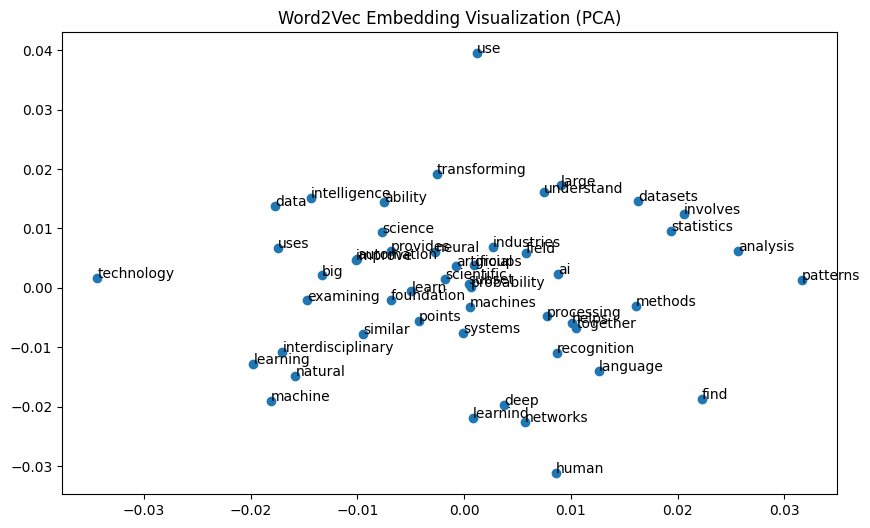


Discovered Topic (Top 5 words each):
{'Topic 1': ['machine', 'human', 'machines', 'learning', 'processing'], 'Topic 2': ['data', 'analysis', 'learning', 'involves', 'find'], 'Topic 3': ['data', 'ai', 'uses', 'neural', 'prediction']}
Document 1 -> Topic 2
Document 2 -> Topic 1
Document 3 -> Topic 1
Document 4 -> Topic 2
Document 5 -> Topic 2
Document 6 -> Topic 3
Document 7 -> Topic 2
Document 8 -> Topic 3
Document 9 -> Topic 2
Document 10 -> Topic 3
Document 11 -> Topic 3
Document 12 -> Topic 2
Document 13 -> Topic 1
Document 14 -> Topic 2
Document 15 -> Topic 3


NameError: name 'vis' is not defined

In [11]:
# NLP Workflow Program
# Objective:Analyze text documents with preprocessing, TF-IDF, Word2vec, and LDA Topic Modeling

import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import Word2Vec
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Downloade required NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')

# Dataset

documents = [
    "Data science is in interdisciplinary field that uses scientific methods.",
    "Machine learning provides systems the ability to learn and improve.",
    "Natural language processing helps machines understand human.",
    "Deep learnind is a subset of machine learning with neural networks.",
    "Big data analysis involves examining large datasets to find patterns.",
    "Artificial intelligence is transforming industries with automation.",
    "Statistics and probability from the foundation of data analysis.",
    "computer vision enable machines tointerpret and process visual data.",
    "Reinforcement learning trains agents through rewards and punishments.",
    "Predictive analytics uses historical data to make future prediction.",
    "Neural network mimic the human brain for pattern recognition.",
    "Clustering groups similar data points together for analysis.",
    "Data visulization communicates insights effectively.",
    "Cloud computing supports large-scale AI applications.",
    "Ethics in AI ensures responsible and fair technology use.",
]

# Text preprocessing

stop_words = set(stopwords.words('english'))

def preprocess(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z\s]', '', text)   # remove punctuation/numbers
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return tokens

tokenized_docs = [preprocess(doc) for doc in documents]
clean_docs = [" ".join(tokens) for tokens in tokenized_docs]

print("Sample preprocessed documents:\n", clean_docs[0])


# TF-IDF Analysis

vectorizer = TfidfVectorizer()
x_tfidf = vectorizer.fit_transform(clean_docs)
tfidf_df = pd.DataFrame(x_tfidf.toarray(), columns=vectorizer.get_feature_names_out())


print("\nTF-IDF Shape:", tfidf_df.shape)

# Top 10 words per documents

for i, doc in enumerate(clean_docs):
  scores = tfidf_df.iloc[i].sort_values(ascending=False)[:10]
  print(f"\nDocuments {i+1} Top 10 Words:\n", scores)

# Word2Vec Embeddings

w2v_model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, workers=4)

# Find most similar words
target_words = ["data", "analysis", "learning", "machine"]
for word in target_words:
  if word in w2v_model.wv:
    similar_words = w2v_model.wv.most_similar(word, topn=5)
    print(f"\nMost similar words to '{word}': {similar_words}")

# Visualize embedding (PCA)
word_vectors = w2v_model.wv
words = list(word_vectors.index_to_key)[:50]  # top 50 words
x = word_vectors[words]

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1])
for i, word in enumerate(words):
  plt.annotate(word, (x_pca[i, 0], x_pca[i, 1]))
plt.title("Word2Vec Embedding Visualization (PCA)")
plt.show()

# Topic Modeling (LDA)

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
x_counts = count_vectorizer.fit_transform(clean_docs)

dictionary = corpora.Dictionary(clean_docs)
corpus = [dictionary.doc2bow(doc) for doc in clean_docs]

lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_model.fit(x_counts)


# Top word per topics
def display_topics(model, feature_names, num_top_words):
  topics = {}
  for topic_idx, topic in enumerate(model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
    topics[f"Topic {topic_idx + 1}"] = top_words
  return topics

topics = display_topics(lda_model, count_vectorizer.get_feature_names_out(), 5)
print("\nDiscovered Topic (Top 5 words each):")
print(topics)

# Assign topic to each document
doc_topics = lda_model.transform(x_counts)
assigned_topics = doc_topics.argmax(axis=1)
for i, t in enumerate(assigned_topics):
  print(f"Document {i+1} -> Topic {t+1}")

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)
# Report


print("\n====Report Summary ===")
print("1. TF-IDF: Highlighted key words per document.")
print("2. Word2Vec: Found semantics similarities between words (e.g., 'data' close to 'statistics').")
print("3. LDA Topic Modeling: Extracted latent topics and assigned documents to them.")